# Real Estate Loan Approval/Rejection Analysis By Alfonso Villalobos Date: 6/27/2025

### Importing the data 

In [1]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('foia-504-fy2010-present-asof-250331.csv')

C:\Users\alfon\AppData\Local\Temp\ipykernel_1096\2386070143.py:1: DtypeWarning: Columns (33,36) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('foia-504-fy2010-present-asof-250331.csv')


In [5]:
df.head()

,AsOfDate,Program,BorrName,BorrStreet,BorrCity,BorrState,BorrZip,LocationID,CDC_Name,CDC_Street,...,SBADistrictOffice,CongressionalDistrict,BusinessType,BusinessAge,LoanStatus,PaidInFullDate,ChargeOffDate,GrossChargeOffAmount,JobsSupported,CollateralInd
0,3/31/2025,504,70 West Main Street Realty Cor,68-70 West Main Street.,Patchogue,NY,11772,188129.0,Empire State Certified Develop,19 British American Blvd. E.,...,MELVILLE BRANCH OFFICE,1.0,CORPORATION,NaN,EXEMPT,NaN,NaN,0,5,Y
1,3/31/2025,504,Above and Beyond Pet Care Hosp,11302 Indiana Avenue.,Lubbock,TX,79423,188248.0,Caprock Business Finance Corpo,1323 58th Street,...,LUBBOCK DISTRICT OFFICE,19.0,CORPORATION,NaN,PIF,8/31/2014,NaN,0,14,Y
2,3/31/2025,504,Cervesia Gratis Inc,1483 Duane St.,Astoria,OR,97103,188239.0,Evergreen Business Capital,13925 Interurban Ave. S,...,PORTLAND DISTRICT OFFICE,1.0,CORPORATION,NaN,PIF,11/30/2014,NaN,0,8,Y
3,3/31/2025,504,HAMMES SEED INC,1123 120th Rd..,Seneca,KS,66538,188333.0,"Frontier Financial Partners, I",1512 W 6th Ave.,...,KANSAS CITY DISTRICT OFFICE,2.0,CORPORATION,NaN,EXEMPT,NaN,NaN,0,1,Y
4,3/31/2025,504,KT&apos;s Bowling Lanes,1501 S. Washington Avenue.,Emmett,ID,83617,188280.0,"Capital Matrix, Inc.",6429 West Interchange Lane,...,BOISE DISTRICT OFFICE,1.0,CORPORATION,NaN,PIF,10/31/2017,NaN,0,10,Y


In [6]:
df.describe()

,Program,BorrZip,LocationID,CDC_Zip,ThirdPartyDollars,GrossApproval,ApprovalFiscalYear,TermInMonths,NaicsCode,CongressionalDistrict,GrossChargeOffAmount,JobsSupported
count,110032.0,110032.000000,110031.000000,110031.000000,1.059280e+05,1.100320e+05,110032.000000,110032.000000,109599.000000,110026.000000,1.100320e+05,110032.000000
mean,504.0,56936.733977,209345.657033,57263.387773,1.100559e+06,8.112459e+05,2017.107932,257.861231,538455.053021,10.071465,4.265585e+03,10.590746
std,0.0,30792.351863,72481.717489,30899.871053,1.445192e+06,8.789665e+05,4.579669,39.121122,169606.914720,11.768521,7.302830e+04,17.760788
min,504.0,601.000000,188085.000000,918.000000,3.202500e+04,5.400000e+02,2010.000000,7.000000,111110.000000,0.000000,0.000000e+00,0.000000
25%,504.0,32792.000000,188146.000000,32303.000000,3.375000e+05,2.700000e+05,2013.000000,240.000000,424490.000000,2.000000,0.000000e+00,2.000000
50%,504.0,58078.000000,188239.000000,58104.000000,6.438655e+05,5.070000e+05,2017.000000,240.000000,541330.000000,5.000000,0.000000e+00,5.000000
75%,504.0,86336.000000,188293.000000,87109.000000,1.261619e+06,9.890000e+05,2021.000000,300.000000,713940.000000,13.000000,0.000000e+00,12.000000
max,504.0,99901.000000,604466.000000,99212.000000,2.956000e+07,5.500000e+06,2025.000000,300.000000,926120.000000,53.000000,4.486077e+06,763.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110032 entries, 0 to 110031
Data columns (total 40 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   AsOfDate                110032 non-null  object 
 1   Program                 110032 non-null  int64  
 2   BorrName                110032 non-null  object 
 3   BorrStreet              110032 non-null  object 
 4   BorrCity                110032 non-null  object 
 5   BorrState               110032 non-null  object 
 6   BorrZip                 110032 non-null  int64  
 7   LocationID              110031 non-null  float64
 8   CDC_Name                110031 non-null  object 
 9   CDC_Street              110031 non-null  object 
 10  CDC_City                110031 non-null  object 
 11  CDC_State               110031 non-null  object 
 12  CDC_Zip                 110031 non-null  float64
 13  ThirdPartyLender_Name   105711 non-null  object 
 14  ThirdPartyLender_Cit

In [94]:
df['NaicsCode'] = df['NaicsCode'].astype(str)
df['LocationID'] = df['LocationID'].astype(str)
df['CDC_Zip'] = df['CDC_Zip'].astype(str)
df['CongressionalDistrict'] = df['CongressionalDistrict'].astype(str)


In [99]:
date_cols = ['AsOfDate', 'ApprovalDate', 'FirstDisbursementDate']
df[date_cols] = df[date_cols].apply(pd.to_datetime, errors='coerce')
df['BusinessAge'] = pd.to_numeric(df['BusinessAge'], errors='coerce')
df['BorrZip'] = df['BorrZip'].astype(str).str.zfill(5)



In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110032 entries, 0 to 110031
Data columns (total 38 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   AsOfDate                   110032 non-null  datetime64[ns]
 1   Program                    110032 non-null  int64         
 2   BorrName                   110032 non-null  object        
 3   BorrStreet                 110032 non-null  object        
 4   BorrCity                   110032 non-null  object        
 5   BorrState                  110032 non-null  object        
 6   BorrZip                    110032 non-null  object        
 7   LocationID                 110032 non-null  object        
 8   CDC_Name                   110032 non-null  object        
 9   CDC_Street                 110032 non-null  object        
 10  CDC_City                   110032 non-null  object        
 11  CDC_State                  110032 non-null  object  

### Data Wrangling

In [113]:
df.isnull().sum()

AsOfDate                          0
Program                           0
BorrName                          0
BorrStreet                        0
BorrCity                          0
BorrState                         0
BorrZip                           0
LocationID                        0
CDC_Name                          0
CDC_Street                        0
CDC_City                          0
CDC_State                         0
CDC_Zip                           0
ThirdPartyLender_Name             0
ThirdPartyLender_City             0
ThirdPartyLender_State            0
ThirdPartyDollars                 0
GrossApproval                     0
ApprovalDate                      0
ApprovalFiscalYear                0
FirstDisbursementDate         21701
ProcessingMethod                  0
Subprogram                        0
TermInMonths                      0
NaicsCode                         0
NaicsDescription                  0
ProjectCounty                     0
ProjectState                

In [114]:
missing_percent = df.isnull().mean() * 100
missing_percent = missing_percent.sort_values(ascending=False)

print(missing_percent[missing_percent > 0])

BusinessAge              100.000000
FirstDisbursementDate     19.722444
dtype: float64


In [115]:
df.drop(['ChargeOffDate','FranchiseName','FranchiseCode'], axis = 1, inplace = True)

KeyError: "['ChargeOffDate', 'FranchiseName', 'FranchiseCode'] not found in axis"

In [116]:
df.drop(['PaidInFullDate'], axis = 1, inplace = True)

KeyError: "['PaidInFullDate'] not found in axis"

In [117]:
df['BusinessAge'].isnull().value_counts()

BusinessAge
True    110032
Name: count, dtype: int64

In [118]:
df['BusinessAge'].value_counts()

Series([], Name: count, dtype: int64)

In [119]:
def clean_business_age(age):
    if pd.isna(age):
        return "Missing"
    age = age.lower()
    if "startup" in age or "open" in age or "new" in age:
        return "Startup (<2 years)"
    elif "change of ownership" in age:
        return "Change of Ownership"
    elif "less than" in age or "existing" in age:
        return "Established (2+ years)"
    elif "unanswered" in age:
        return "Missing"
    else:
        return "Other"


In [120]:
df['BusinessAge'] = df['BusinessAge'].apply(clean_business_age)

In [123]:
df['BusinessAge'].value_counts()


BusinessAge
Missing    110032
Name: count, dtype: int64

In [124]:
df['BusinessAge'].unique()


array(['Missing'], dtype=object)

In [32]:
df['BusinessAge_missing'] = (df['BusinessAge'] == 'Missing').astype(int)


In [121]:
df['BusinessAge_missing'].value_counts()

BusinessAge_missing
1    57862
0    52170
Name: count, dtype: int64

In [36]:
df['FirstDisbursementDate'].isnull().value_counts()

FirstDisbursementDate
False    88331
True     21701
Name: count, dtype: int64

In [38]:
df['FirstDisbursement_missing'] = df['FirstDisbursementDate'].isnull().astype(int)

print(df['FirstDisbursement_missing'].value_counts())
print("\nLoanStatus distribution by missing flag:")
print(df.groupby('FirstDisbursement_missing')['LoanStatus'].value_counts(normalize=True))

FirstDisbursement_missing
0    88331
1    21701
Name: count, dtype: int64

LoanStatus distribution by missing flag:
FirstDisbursement_missing  LoanStatus
0                          EXEMPT        0.621273
                           PIF           0.368946
                           CHGOFF        0.009782
1                          CANCLD        0.604120
                           NOT FUNDED    0.395880
Name: proportion, dtype: float64


In [39]:
not_funded_df = df[df['LoanStatus'] == 'NOT FUNDED']


In [47]:
not_funded_df['ProjectState'].value_counts().head(10)


ProjectState
CA    1321
FL    1086
TX     505
IL     360
MA     304
GA     287
NY     275
MN     263
UT     259
AZ     242
Name: count, dtype: int64

In [51]:
not_funded_df['ProjectCounty'].value_counts().head(10)

ProjectCounty
LOS ANGELES     391
ORANGE          193
MIAMI-DADE      190
MARICOPA        176
COOK            145
SAN DIEGO       105
CLARK            88
HILLSBOROUGH     88
BROWARD          85
WASHINGTON       84
Name: count, dtype: int64

In [54]:
fl_not_funded = not_funded_df[not_funded_df['ProjectState'] == 'FL']
fl_not_funded['ProjectCounty'].value_counts()
fl_not_funded['ProjectCounty'].value_counts().head(10)


ProjectCounty
MIAMI-DADE      190
BROWARD          85
HILLSBOROUGH     70
ORANGE           68
PALM BEACH       59
DUVAL            56
PINELLAS         46
LEE              45
SAINT JOHNS      35
PASCO            34
Name: count, dtype: int64

In [41]:
not_funded_df['ApprovalFiscalYear'].value_counts().sort_index()

ApprovalFiscalYear
2013       1
2016       3
2017       2
2018       2
2019       2
2020      21
2021     642
2022    1201
2023    1362
2024    2543
2025    2812
Name: count, dtype: int64

In [44]:

not_funded_df['BusinessAge'].value_counts()

BusinessAge
Established (2+ years)    6622
Startup (<2 years)        1766
Change of Ownership        197
Missing                      6
Name: count, dtype: int64

In [43]:
not_funded_df[['GrossApproval', 'ThirdPartyDollars']].describe()


,GrossApproval,ThirdPartyDollars
count,8.591000e+03,8.526000e+03
mean,1.278081e+06,1.832960e+06
std,1.223285e+06,2.264424e+06
min,4.000000e+04,4.957800e+04
25%,4.240000e+05,5.375000e+05
50%,8.310000e+05,1.050000e+06
75%,1.694000e+06,2.214148e+06
max,5.500000e+06,2.800000e+07


In [102]:
not_funded_df['NaicsDescription'].value_counts().head(10)

NaicsDescription
Unknown                                                     696
Full-Service Restaurants                                    501
Hotels (except Casino Hotels) and Motels                    475
Child Day Care Services                                     336
Limited-Service Restaurants                                 264
Offices of Physicians (except Mental Health Specialists)    220
Offices of Dentists                                         177
Car Washes                                                  170
Lessors of Miniwarehouses and Self-Storage Units            159
General Automotive Repair                                   142
Name: count, dtype: int64

In [55]:
df.head()

,AsOfDate,Program,BorrName,BorrStreet,BorrCity,BorrState,BorrZip,LocationID,CDC_Name,CDC_Street,...,SBADistrictOffice,CongressionalDistrict,BusinessType,BusinessAge,LoanStatus,GrossChargeOffAmount,JobsSupported,CollateralInd,BusinessAge_missing,FirstDisbursement_missing
0,3/31/2025,504,70 West Main Street Realty Cor,68-70 West Main Street.,Patchogue,NY,11772,188129.0,Empire State Certified Develop,19 British American Blvd. E.,...,MELVILLE BRANCH OFFICE,1.0,CORPORATION,Missing,EXEMPT,0,5,Y,1,0
1,3/31/2025,504,Above and Beyond Pet Care Hosp,11302 Indiana Avenue.,Lubbock,TX,79423,188248.0,Caprock Business Finance Corpo,1323 58th Street,...,LUBBOCK DISTRICT OFFICE,19.0,CORPORATION,Missing,PIF,0,14,Y,1,0
2,3/31/2025,504,Cervesia Gratis Inc,1483 Duane St.,Astoria,OR,97103,188239.0,Evergreen Business Capital,13925 Interurban Ave. S,...,PORTLAND DISTRICT OFFICE,1.0,CORPORATION,Missing,PIF,0,8,Y,1,0
3,3/31/2025,504,HAMMES SEED INC,1123 120th Rd..,Seneca,KS,66538,188333.0,"Frontier Financial Partners, I",1512 W 6th Ave.,...,KANSAS CITY DISTRICT OFFICE,2.0,CORPORATION,Missing,EXEMPT,0,1,Y,1,0
4,3/31/2025,504,KT&apos;s Bowling Lanes,1501 S. Washington Avenue.,Emmett,ID,83617,188280.0,"Capital Matrix, Inc.",6429 West Interchange Lane,...,BOISE DISTRICT OFFICE,1.0,CORPORATION,Missing,PIF,0,10,Y,1,0


In [103]:
df['ThirdPartyLender_Name'].fillna('None', inplace=True)
df['ThirdPartyLender_City'].fillna('None', inplace=True)
df['ThirdPartyLender_State'].fillna('None', inplace=True)
df['ThirdPartyDollars'].fillna(0, inplace=True)

df['NaicsDescription'].fillna('Unknown', inplace=True)
df['NaicsCode'].fillna(df['NaicsCode'].mode()[0], inplace=True)

df['ProjectCounty'].fillna('Unknown', inplace=True)

C:\Users\alfon\AppData\Local\Temp\ipykernel_1096\2275434349.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ThirdPartyLender_Name'].fillna('None', inplace=True)
C:\Users\alfon\AppData\Local\Temp\ipykernel_1096\2275434349.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

In [104]:
df['BusinessType'].fillna(df['BusinessType'].mode()[0], inplace=True)
df['CongressionalDistrict'].fillna(df['CongressionalDistrict'].mode()[0], inplace=True)
df['LocationID'].fillna(method='ffill', inplace=True)  # simple forward fill
df['CDC_Name'].fillna('Unknown', inplace=True)
df['CDC_State'].fillna('Unknown', inplace=True)
df['SBADistrictOffice'].fillna('Unknown', inplace=True)
df['CDC_Street'].fillna('Unknown', inplace=True)
df['CDC_Zip'].fillna(df['CDC_Zip'].mode()[0], inplace=True)
df['CDC_City'].fillna('Unknown', inplace=True)
df['LoanStatus'].fillna('Unknown', inplace=True)

C:\Users\alfon\AppData\Local\Temp\ipykernel_1096\1122935349.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['BusinessType'].fillna(df['BusinessType'].mode()[0], inplace=True)
C:\Users\alfon\AppData\Local\Temp\ipykernel_1096\1122935349.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves 

In [105]:
# Confirm no missing values
print(df.isnull().sum().sort_values(ascending=False).head(10))


BusinessAge              110032
FirstDisbursementDate     21701
BorrName                      0
BorrStreet                    0
AsOfDate                      0
Program                       0
BorrState                     0
BorrCity                      0
CDC_Name                      0
BorrZip                       0
dtype: int64


In [106]:
not_funded_df = df[df['LoanStatus'] == 'NOT FUNDED']

In [107]:
not_funded_df.describe()

,AsOfDate,Program,ThirdPartyDollars,GrossApproval,ApprovalDate,ApprovalFiscalYear,FirstDisbursementDate,TermInMonths,BusinessAge,GrossChargeOffAmount,JobsSupported,BusinessAge_missing,FirstDisbursement_missing
count,8591,8591.0,8.591000e+03,8.591000e+03,8591,8591.000000,0,8591.000000,0.0,8591.0,8591.000000,8591.000000,8591.0
mean,2025-03-31 00:00:00,504.0,1.819092e+06,1.278081e+06,2023-11-10 20:57:58.058433280,2023.646956,NaT,290.913747,NaN,0.0,11.505529,0.000698,1.0
min,2025-03-31 00:00:00,504.0,0.000000e+00,4.000000e+04,2013-07-18 00:00:00,2013.000000,NaT,120.000000,NaN,0.0,0.000000,0.000000,1.0
25%,2025-03-31 00:00:00,504.0,5.250000e+05,4.240000e+05,2022-12-29 00:00:00,2023.000000,NaT,300.000000,NaN,0.0,3.000000,0.000000,1.0
50%,2025-03-31 00:00:00,504.0,1.038243e+06,8.310000e+05,2024-04-18 00:00:00,2024.000000,NaT,300.000000,NaN,0.0,6.000000,0.000000,1.0
75%,2025-03-31 00:00:00,504.0,2.200000e+06,1.694000e+06,2024-11-26 00:00:00,2025.000000,NaT,300.000000,NaN,0.0,15.000000,0.000000,1.0
max,2025-03-31 00:00:00,504.0,2.800000e+07,5.500000e+06,2025-03-31 00:00:00,2025.000000,NaT,300.000000,NaN,0.0,500.000000,1.000000,1.0
std,NaN,0.0,2.261426e+06,1.223285e+06,NaN,1.301661,NaN,30.911506,NaN,0.0,17.574361,0.026420,0.0


### EDA

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns

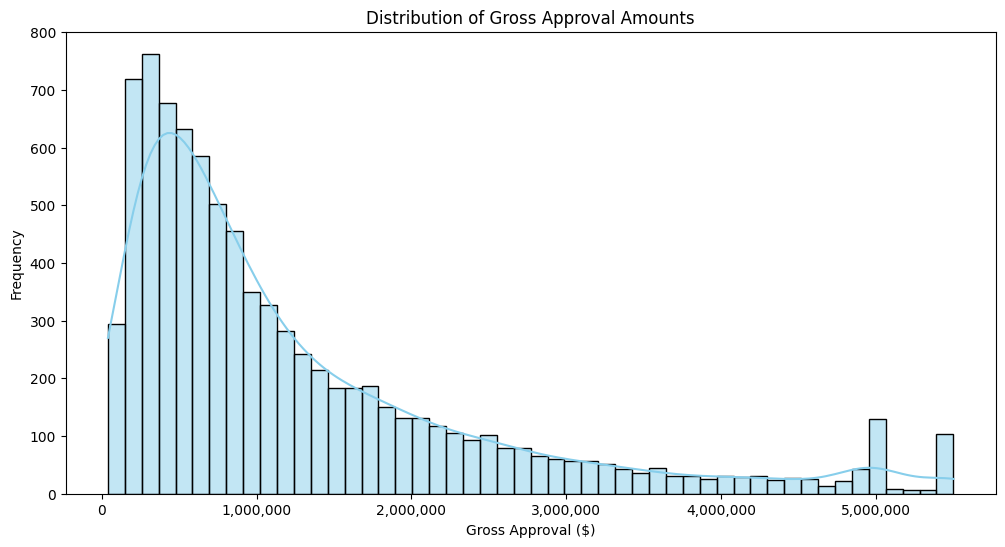

In [109]:
import matplotlib.ticker as ticker

plt.figure(figsize=(12,6))
sns.histplot(data=not_funded_df, x='GrossApproval', bins=50, kde=True, color='skyblue', edgecolor='black')
plt.title('Distribution of Gross Approval Amounts')
plt.xlabel('Gross Approval ($)')
plt.ylabel('Frequency')

# Format x-axis with commas
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.show()



C:\Users\alfon\AppData\Local\Temp\ipykernel_1096\3980688298.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


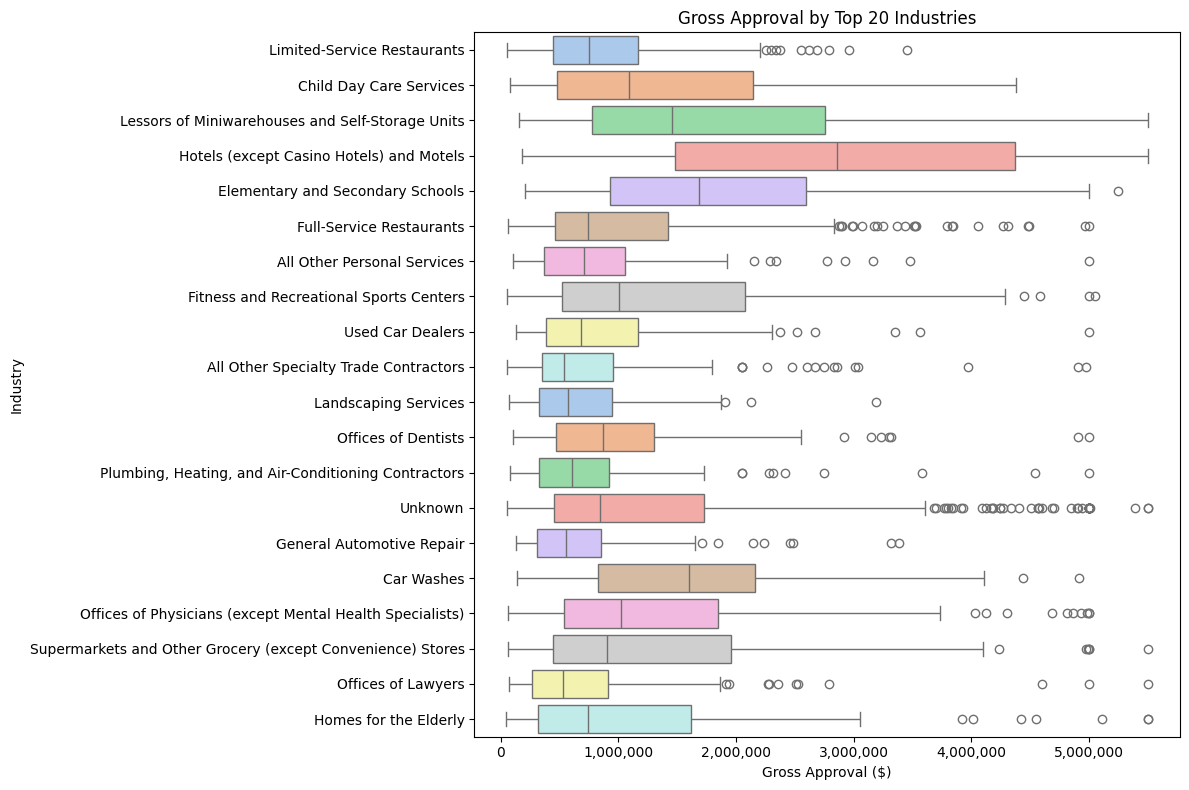

In [110]:
top_industries = not_funded_df['NaicsDescription'].value_counts().head(20).index
filtered_df = not_funded_df[not_funded_df['NaicsDescription'].isin(top_industries)]
plt.figure(figsize=(12, 8))
sns.boxplot(
    data=filtered_df,
    x='GrossApproval',
    y='NaicsDescription',
    palette='pastel',
    linewidth=1
)
plt.title("Gross Approval by Top 20 Industries")
plt.xlabel("Gross Approval ($)")
plt.ylabel("Industry")
plt.tight_layout()
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.show()

### Relationships between the variables 

In [125]:
# Only reload BusinessAge column from the original file
original = pd.read_csv('foia-504-fy2010-present-asof-250331.csv', usecols=['BusinessAge'])

# Replace the broken column with the fresh one
df['BusinessAge'] = original['BusinessAge']


C:\Users\alfon\AppData\Local\Temp\ipykernel_1096\1137322176.py:2: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  original = pd.read_csv('foia-504-fy2010-present-asof-250331.csv', usecols=['BusinessAge'])


In [126]:
df['BusinessAge'].value_counts(dropna=False)

BusinessAge
NaN                                       57167
Existing or more than 2 years old         42400
Startup, Loan Funds will Open Business     6610
Change of Ownership                        1168
Existing, 5 or more years                   881
New Business or 2 years or less             710
Unanswered                                  695
New, Less than 1 Year old                   179
Less than 4 years old but at least 3         80
Less than 3 years old but at least 2         71
Less than 5 years old but at least 4         71
Name: count, dtype: int64

In [127]:
age_map = {
    'Startup, Loan Funds will Open Business': 0,
    'New, Less than 1 Year old': 1,
    'New Business or 2 years or less': 2,
    'Less than 3 years old but at least 2': 3,
    'Less than 4 years old but at least 3': 4,
    'Less than 5 years old but at least 4': 5,
    'Existing or more than 2 years old': 6,
    'Existing, 5 or more years': 7,
    'Change of Ownership': 8,
    'Unanswered': np.nan
}
df['BusinessAge_num'] = df['BusinessAge'].map(age_map)


In [129]:
df['BusinessAge_num'].value_counts()

BusinessAge_num
6.0    42400
0.0     6610
8.0     1168
7.0      881
2.0      710
1.0      179
4.0       80
3.0       71
5.0       71
Name: count, dtype: int64

In [130]:
not_funded_df = df[df['LoanStatus'] == 'NOT FUNDED'].copy()


In [131]:
print(not_funded_df.columns)

Index(['AsOfDate', 'Program', 'BorrName', 'BorrStreet', 'BorrCity',
       'BorrState', 'BorrZip', 'LocationID', 'CDC_Name', 'CDC_Street',
       'CDC_City', 'CDC_State', 'CDC_Zip', 'ThirdPartyLender_Name',
       'ThirdPartyLender_City', 'ThirdPartyLender_State', 'ThirdPartyDollars',
       'GrossApproval', 'ApprovalDate', 'ApprovalFiscalYear',
       'FirstDisbursementDate', 'ProcessingMethod', 'Subprogram',
       'TermInMonths', 'NaicsCode', 'NaicsDescription', 'ProjectCounty',
       'ProjectState', 'SBADistrictOffice', 'CongressionalDistrict',
       'BusinessType', 'BusinessAge', 'LoanStatus', 'GrossChargeOffAmount',
       'JobsSupported', 'CollateralInd', 'BusinessAge_missing',
       'FirstDisbursement_missing', 'BusinessAge_num'],
      dtype='object')


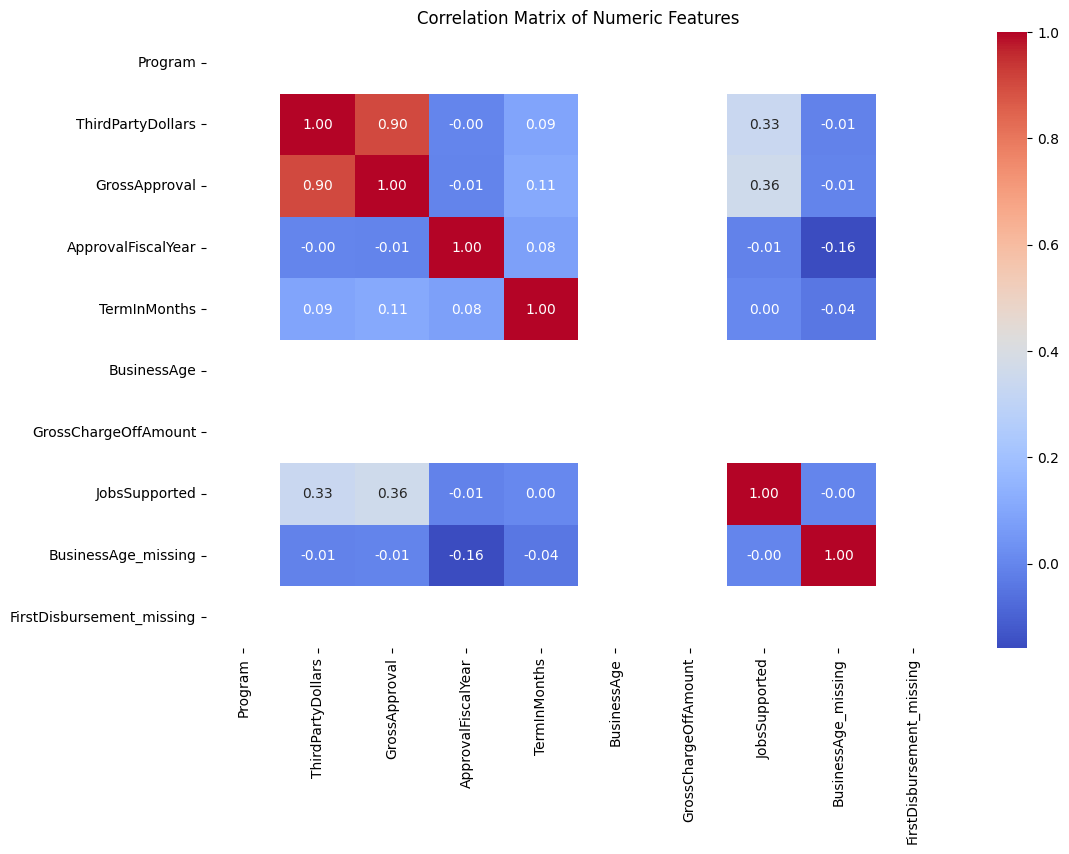

In [111]:
numeric_df = not_funded_df.select_dtypes(include='number')

correlation_matrix = numeric_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Features')
plt.show()


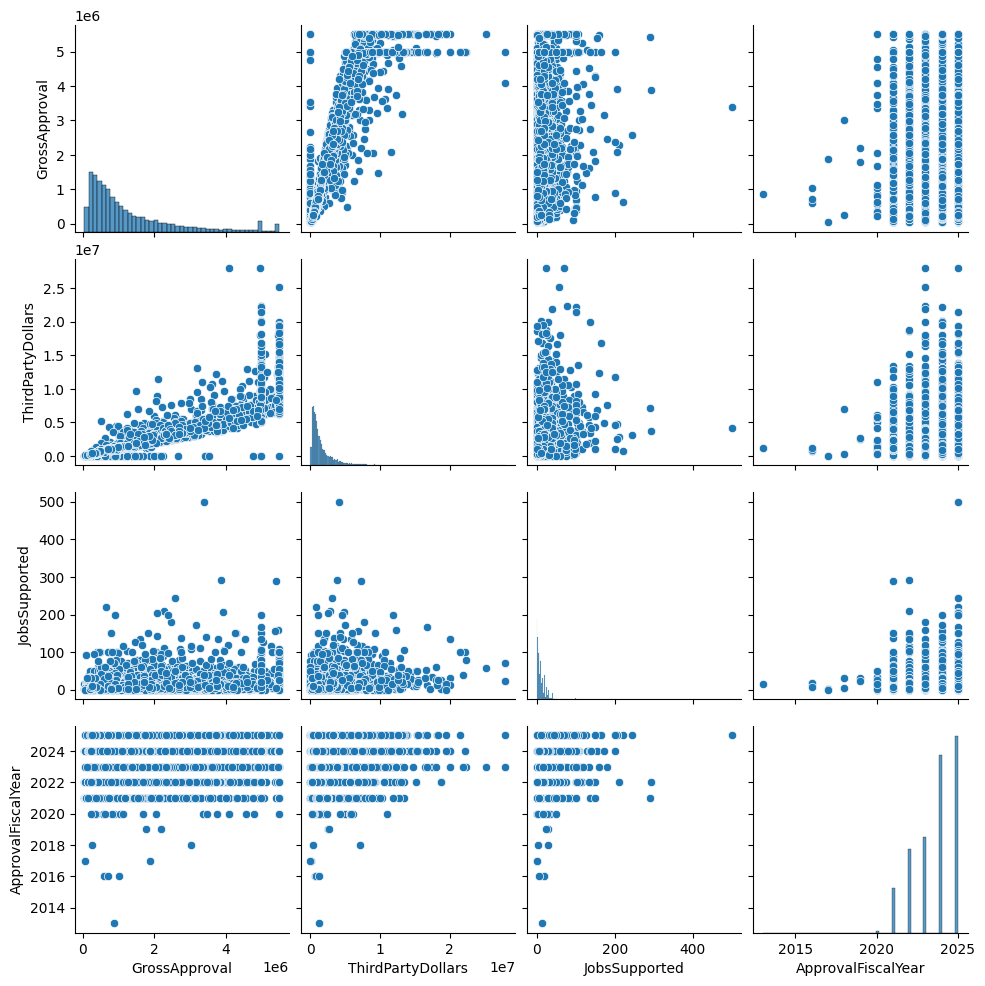

In [112]:
subset = not_funded_df[['GrossApproval', 'ThirdPartyDollars','LocationID', 'JobsSupported', 'NaicsCode', 'ApprovalFiscalYear']]

# Plot
sns.pairplot(subset)
plt.show()

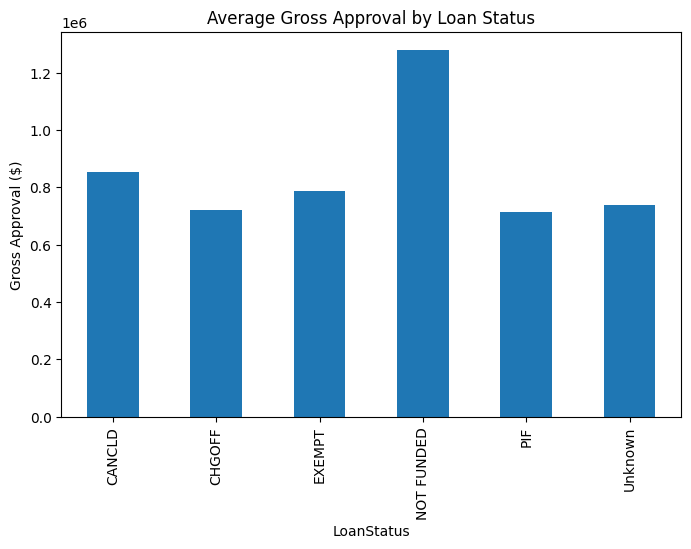

In [134]:
df.groupby('LoanStatus')['GrossApproval'].mean().plot(kind='bar', figsize=(8,5), title='Average Gross Approval by Loan Status')
plt.ylabel('Gross Approval ($)')
plt.show()



In [139]:
industry_agg = (
    not_funded_df
    .groupby('NaicsDescription')['GrossApproval']
    .agg(['count', 'mean'])
    .sort_values(by='count', ascending=False)
    .head(20)  # still optional: shows top 20 by count
)


In [140]:
industry_agg

,count,mean
NaicsDescription,,
Unknown,696,1.273261e+06
Full-Service Restaurants,501,1.055208e+06
Hotels (except Casino Hotels) and Motels,475,2.910280e+06
Child Day Care Services,336,1.324033e+06
Limited-Service Restaurants,264,8.766894e+05
Offices of Physicians (except Mental Health Specialists),220,1.358318e+06
Offices of Dentists,177,1.048531e+06
Car Washes,170,1.594282e+06
Lessors of Miniwarehouses and Self-Storage Units,159,1.909686e+06


C:\Users\alfon\AppData\Local\Temp\ipykernel_1096\4231148550.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(industry_sorted.index, rotation=75, ha='right')


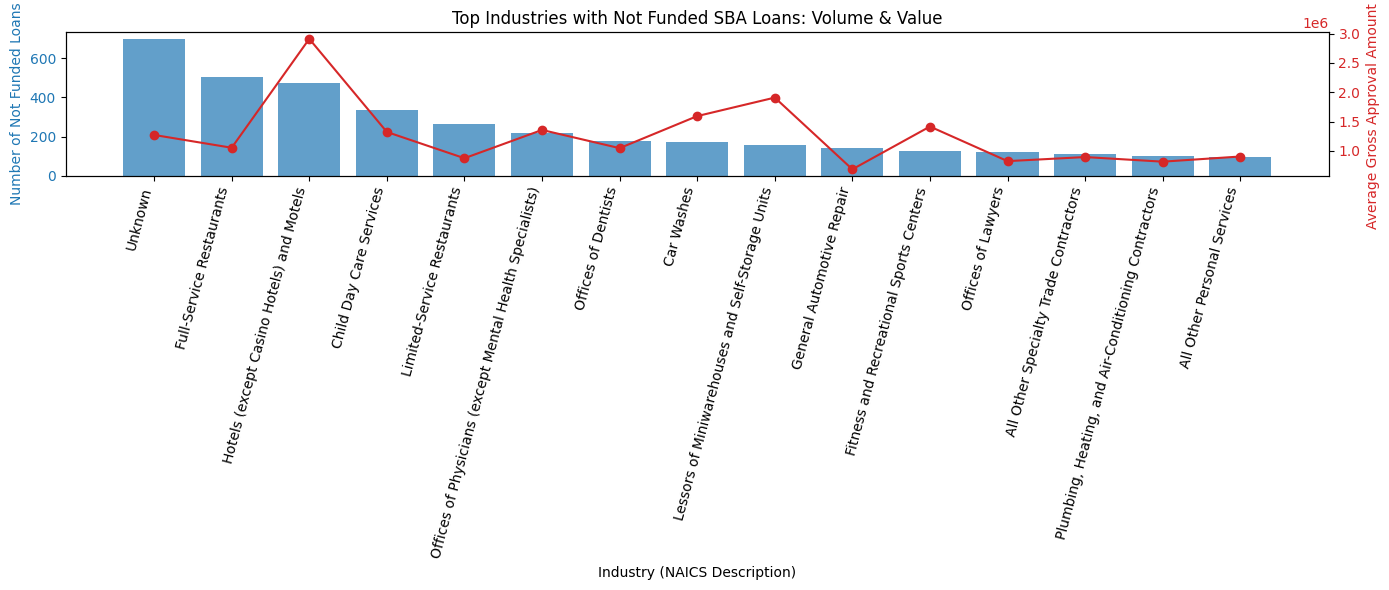

In [149]:
import matplotlib.pyplot as plt

# Sort industries by number of not funded loans
industry_sorted = industry_agg.sort_values(by='count', ascending=False).head(15)

fig, ax1 = plt.subplots(figsize=(14, 6))

# Bar plot for number of loans
color1 = 'tab:blue'
ax1.set_xlabel('Industry (NAICS Description)')
ax1.set_ylabel('Number of Not Funded Loans', color=color1)
ax1.bar(industry_sorted.index, industry_sorted['count'], color=color1, alpha=0.7)
ax1.tick_params(axis='y', labelcolor=color1)
ax1.set_xticklabels(industry_sorted.index, rotation=75, ha='right')

# Line plot for mean loan amount
ax2 = ax1.twinx()
color2 = 'tab:red'
ax2.set_ylabel('Average Gross Approval Amount ($)', color=color2)
ax2.plot(industry_sorted.index, industry_sorted['mean'], color=color2, marker='o')
ax2.tick_params(axis='y', labelcolor=color2)

plt.title('Top Industries with Not Funded SBA Loans: Volume & Value')
plt.tight_layout()
plt.show()



In [142]:
industry_agg_by_dollar = (
    not_funded_df
    .groupby('NaicsDescription')['GrossApproval']
    .agg(['count', 'mean'])
    .sort_values(by='mean', ascending=False)
    .head(20)
)

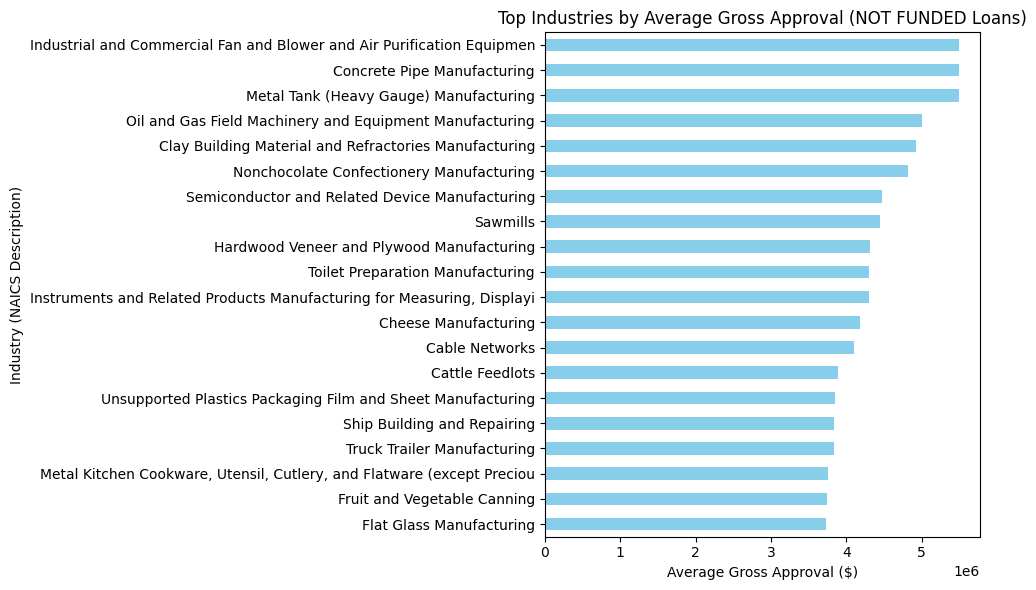

In [144]:
plt.figure(figsize=(10,6))
industry_agg_by_dollar['mean'].sort_values().plot(kind='barh', color='skyblue')
plt.title('Top Industries by Average Gross Approval (NOT FUNDED Loans)')
plt.xlabel('Average Gross Approval ($)')
plt.ylabel('Industry (NAICS Description)')
plt.tight_layout()
plt.show()


### Is there a relationship between loans that aren't funded and the collateral of the loan?

In [150]:
pd.crosstab(df['CollateralInd'], df['LoanStatus'], normalize='index') * 100


LoanStatus,CANCLD,CHGOFF,EXEMPT,NOT FUNDED,PIF,Unknown
CollateralInd,,,,,,
N,19.367158,3.382433,17.566830,0.000000,59.683579,0.000000
Y,11.788464,0.741227,50.420984,7.939999,29.108402,0.000924


In [151]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['CollateralInd'], df['LoanStatus'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi2 = {chi2:.2f}, p-value = {p:.4f}")


Chi2 = 1351.60, p-value = 0.0000


In [152]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['CollateralInd'], df['LoanStatus'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi2 = {chi2:.2f}, p-value = {p:.4f}")


Chi2 = 1351.60, p-value = 0.0000


In [153]:
df['CollateralInd'].value_counts()

CollateralInd
Y    108199
N      1833
Name: count, dtype: int64

In [154]:
df['CollateralInd_encoded'] = df['CollateralInd'].map({'Y': 1, 'N': 0})


In [156]:
df['CollateralInd_encoded'].value_counts()

CollateralInd_encoded
1    108199
0      1833
Name: count, dtype: int64

### Models

In [164]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np


In [159]:
X = df[['CollateralInd_encoded']]  
y = df['GrossApproval']           

In [160]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)
y_pred_lin = lin_reg.predict(X)

In [165]:
print("Linear Regression:")
print("R²:", r2_score(y, y_pred_lin))
print("RMSE:", np.sqrt(mean_squared_error(y, y_pred_lin)))
print("MAE:", mean_absolute_error(y, y_pred_lin))


Linear Regression:
R²: 0.0005970827125776346
RMSE: 878700.032936378
MAE: 595188.0570807273


In [166]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

poly_reg = LinearRegression()
poly_reg.fit(X_poly, y)
y_pred_poly = poly_reg.predict(X_poly)

In [168]:
print("\nPolynomial Regression (degree=2):")
print("R²:", r2_score(y, y_pred_poly))
print("RMSE:", mean_squared_error(y, y_pred_poly))
print("MAE:", mean_absolute_error(y, y_pred_poly))


Polynomial Regression (degree=2):
R²: 0.0005970827125776346
RMSE: 772113747882.3918
MAE: 595188.0570807273


In [169]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_scaled)

In [170]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Scale + Ridge Model pipeline
ridge_pipeline = make_pipeline(StandardScaler(), Ridge())

# Fit model
ridge_pipeline.fit(X, y)

# Predict
y_pred_ridge = ridge_pipeline.predict(X)


In [171]:
print("Ridge Regression:")
print("R²:", r2_score(y, y_pred_ridge))
print("RMSE:", np.sqrt(mean_squared_error(y, y_pred_ridge)))
print("MAE:", mean_absolute_error(y, y_pred_ridge))

Ridge Regression:
R²: 0.0005970827125281186
RMSE: 878700.0329363998
MAE: 595188.0577725946


In [173]:
from sklearn.model_selection import GridSearchCV

# Define range of alphas to test
param_grid = {'ridge__alpha': [0.01, 0.1, 1, 10, 100, 1000]}

# Grid search using pipeline
grid = GridSearchCV(ridge_pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid.fit(X, y)

# Best alpha
print("Best alpha:", grid.best_params_['ridge__alpha'])

# Evaluate with best model
best_model = grid.best_estimator_
y_pred_best = best_model.predict(X)

print("Tuned Ridge Regression:")
print("R²:", r2_score(y, y_pred_best))
print("RMSE:", np.sqrt(mean_squared_error(y, y_pred_best)))
print("MAE:", mean_absolute_error(y, y_pred_best))


Best alpha: 1000
Tuned Ridge Regression:
R²: 0.0005970342799341832
RMSE: 878700.0542279733
MAE: 595188.7688654916


In [177]:
df['NaicsCode'] = df['NaicsCode'].astype(str)
df['NaicsSector'] = df['NaicsCode'].str[:2]
df['NaicsSector_encoded'] = df['NaicsSector'].astype('category').cat.codes


In [179]:
not_funded_df['CollateralInd_encoded'] = not_funded_df['CollateralInd'].map({'Y': 1, 'N': 0})


In [180]:
not_funded_df['NaicsSector'] = df.loc[not_funded_df.index, 'NaicsSector']
not_funded_df['NaicsSector_encoded'] = df.loc[not_funded_df.index, 'NaicsSector_encoded']


In [181]:
features = [
    'BusinessAge_num',
    'TermInMonths',
    'CollateralInd_encoded',
    'NaicsSector_encoded',
    'JobsSupported'
]
target = 'GrossApproval'


In [182]:
X = not_funded_df[features]
y = not_funded_df[target]


In [183]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [185]:
X.isnull().sum()


BusinessAge_num          6
TermInMonths             0
CollateralInd_encoded    0
NaicsSector_encoded      0
JobsSupported            0
dtype: int64

In [186]:
X = X.dropna()
y = y.loc[X.index]  

In [187]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [188]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [189]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred_lr = lr.predict(X_test)

print("Linear Regression Results:")
print("R²:", r2_score(y_test, y_pred_lr))
print("RMSE:", mean_squared_error(y_test, y_pred_lr) ** 0.5)
print("MAE:", mean_absolute_error(y_test, y_pred_lr))


Linear Regression Results:
R²: 0.16475128719552168
RMSE: 1150515.2516364031
MAE: 834334.8391866623


In [190]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)  


In [191]:
from sklearn.model_selection import train_test_split
X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)


In [195]:
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)
y_pred_poly = poly_reg.predict(X_test_poly)

In [196]:
print("Polynomial Regression (degree=2):")
print("R²:", r2_score(y_test, y_pred_poly))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_poly)))
print("MAE:", mean_absolute_error(y_test, y_pred_poly))

Polynomial Regression (degree=2):
R²: 0.2174336720933111
RMSE: 1113640.5889245218
MAE: 795839.5915656962


In [198]:
from sklearn.linear_model import Ridge


ridge = Ridge()
ridge.fit(X_train, y_train)


y_pred_ridge = ridge.predict(X_test)


print("Ridge Regression:")
print("R²:", r2_score(y_test, y_pred_ridge))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_ridge)))
print("MAE:", mean_absolute_error(y_test, y_pred_ridge))


Ridge Regression:
R²: 0.16475118128588362
RMSE: 1150515.3245791376
MAE: 834334.9805653044


In [199]:
ridge = Ridge()
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100, 1000, 5000]}

# Set up grid search with cross-validation
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit on training data
grid_search.fit(X_train, y_train)

# Best model and hyperparameter
best_ridge = grid_search.best_estimator_
best_alpha = grid_search.best_params_['alpha']

# Predict with best model
y_pred_ridge_tuned = best_ridge.predict(X_test)

In [200]:
print("Tuned Ridge Regression:")
print("Best alpha:", best_alpha)
print("R²:", r2_score(y_test, y_pred_ridge_tuned))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_ridge_tuned)))
print("MAE:", mean_absolute_error(y_test, y_pred_ridge_tuned))

Tuned Ridge Regression:
Best alpha: 1000
R²: 0.1646419755191585
RMSE: 1150590.5349827707
MAE: 834476.4862222672


In [201]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

poly_pipeline = Pipeline([
    ('poly_features', PolynomialFeatures(degree=2, include_bias=False)),
    ('lin_reg', LinearRegression())
])


In [202]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'poly_features__degree': [1, 2, 3, 4] 
}

grid_search = GridSearchCV(poly_pipeline, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           verbose=1, n_jobs=-1)

grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 4 candidates, totalling 20 fits


,estimator,Pipeline(step...egression())])
,param_grid,"{'poly_features__degree': [1, 2, ...]}"
,scoring,'neg_mean_squared_error'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,degree,2


In [204]:
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

print("Best Degree:", grid_search.best_params_['poly_features__degree'])
print("R²:", r2_score(y_test, y_pred_best))
print("RMSE:", np.sqrt(np.mean((y_test - y_pred_best) ** 2)))
print("MAE:", mean_absolute_error(y_test, y_pred_best))

Best Degree: 2
R²: 0.2174336720933111
RMSE: 1113640.5889245218
MAE: 795839.5915656962


### Feature Engineering 

In [205]:
df['ApprovalPerJob'] = df['GrossApproval'] / (df['JobsSupported'] + 1e-5)
df['LoanDensity'] = df['GrossApproval'] / (df['TermInMonths'] + 1e-5)
df['IsStartup'] = (df['BusinessAge_num'] == 1).astype(int)
df['JobsPerMonth'] = df['JobsSupported'] / (df['TermInMonths'] + 1e-5)


In [206]:
# Avoid divide-by-zero with small constant (1e-5)
not_funded_df['ApprovalPerJob'] = not_funded_df['GrossApproval'] / (not_funded_df['JobsSupported'] + 1e-5)

not_funded_df['LoanDensity'] = not_funded_df['GrossApproval'] / (not_funded_df['TermInMonths'] + 1e-5)

not_funded_df['IsStartup'] = (not_funded_df['BusinessAge_num'] == 1).astype(int)

not_funded_df['JobsPerMonth'] = not_funded_df['JobsSupported'] / (not_funded_df['TermInMonths'] + 1e-5)


In [207]:
features = [
    'BusinessAge_num',
    'TermInMonths',
    'CollateralInd_encoded',
    'NaicsSector_encoded',
    'JobsSupported',
    'ApprovalPerJob',
    'LoanDensity',
    'IsStartup',
    'JobsPerMonth'
]

X = not_funded_df[features]
y = not_funded_df['GrossApproval']

In [208]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [210]:
print(X.isnull().sum())

BusinessAge_num          6
TermInMonths             0
CollateralInd_encoded    0
NaicsSector_encoded      0
JobsSupported            0
ApprovalPerJob           0
LoanDensity              0
IsStartup                0
JobsPerMonth             0
dtype: int64


In [211]:
X = X.dropna()
y = y.loc[X.index] 


In [212]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [213]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

In [214]:
print("R²:", r2_score(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("MAE:", mean_absolute_error(y_test, y_pred_lr))

R²: 0.9870451305175575
RMSE: 143285.08763784793
MAE: 96978.21540747893


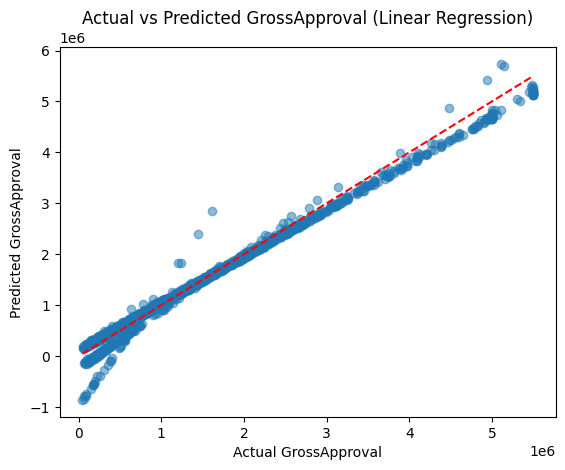

In [215]:
plt.scatter(y_test, y_pred_lr, alpha=0.5)
plt.xlabel("Actual GrossApproval")
plt.ylabel("Predicted GrossApproval")
plt.title("Actual vs Predicted GrossApproval (Linear Regression)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

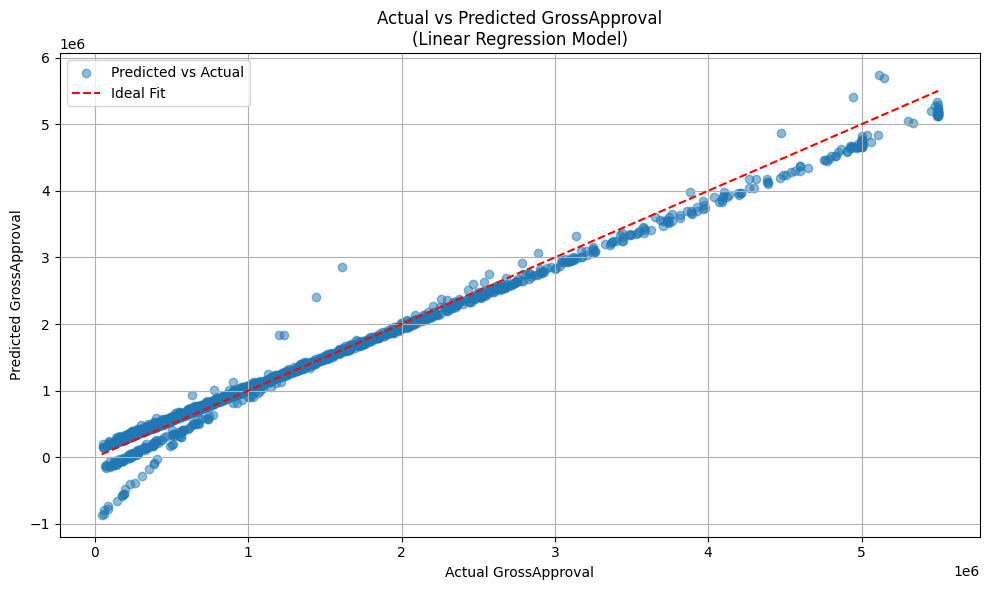

In [216]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.5, label="Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label="Ideal Fit")
plt.xlabel("Actual GrossApproval")
plt.ylabel("Predicted GrossApproval")
plt.title("Actual vs Predicted GrossApproval\n(Linear Regression Model)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [218]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lr, X, y, cv=5, scoring='r2')
print("Cross-validated R² scores:", scores)
print("Mean R²:", scores.mean())

Cross-validated R² scores: [0.95964421 0.96164976 0.97864646 0.94370259 0.98697964]
Mean R²: 0.9661245343274969


### Saving the model

In [221]:
final_model = lr  

import joblib
joblib.dump(final_model, 'final_model.pkl') 

['final_model.pkl']